The first eight roots are:
[3.123030919595691, 6.273435713992182, 9.418207542251576, 12.561423185525362, 15.703997892744033, 18.846248038288376, 21.988311475481623, 25.130257756406696]


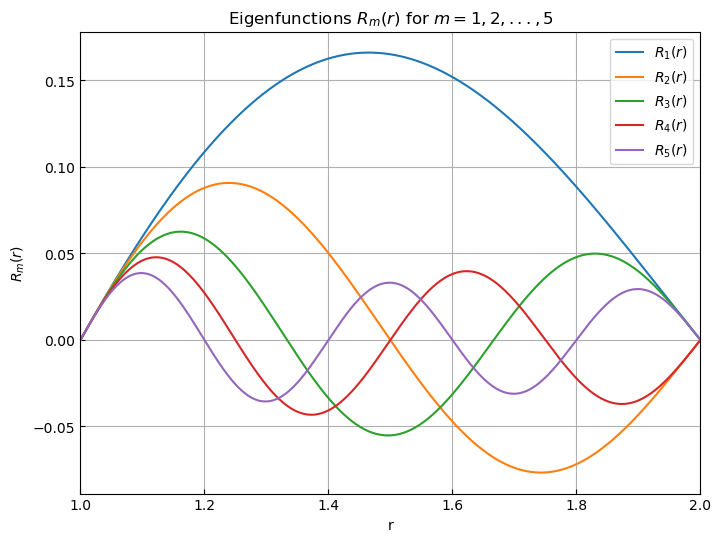

In [22]:
import numpy as np
from scipy.optimize import newton
from scipy.special import jn, yn
import matplotlib.pyplot as plt

# Given values
R_i = 1
R_0 = 2

# Define the transcendental equation
def equation(beta):
    return jn(0, beta * R_i) * yn(0, beta * R_0) - jn(0, beta * R_0) * yn(0, beta * R_i)

# Initial guesses for the roots
initial_guesses = [3, 6, 9, 12, 15, 18, 21, 24]

roots = []

# Find the first eight roots of the transcendental equation
for guess in initial_guesses:
    try:
        # Find the root using the newton method
        root = newton(equation, guess)
        # Append the root to the list if it is not already in the list
        if not any(np.isclose(root, r) for r in roots):
            roots.append(root)
    except RuntimeError:
        print(f"No root found near the initial guess {guess}")

# Display the roots
print("The first eight roots are:")
print(roots)

# Define the eigenfunction R_m(r)
def R_m(r, beta_m):
    return jn(0, beta_m * R_i) * yn(0, beta_m * r) - jn(0, beta_m * r) * yn(0, beta_m * R_i)

# Define the range of r
r = np.linspace(R_i, R_0, 1000)

# Plot the eigenfunctions for m = 1, 2, ..., 5
plt.figure(figsize=(8,6))
for m in range(1, 6):
    beta_m = roots[m - 1]
    plt.plot(r, R_m(r, beta_m), label=f'$R_{m}(r)$')

plt.title('Eigenfunctions $R_m(r)$ for $m = 1, 2, ..., 5$')
plt.xlabel('r')
plt.ylabel('$R_m(r)$')
plt.legend()
plt.grid(True)
plt.xlim(1,2)
plt.savefig('HW3_Q4.png', dpi=400, bbox_inches='tight')
plt.show()
